In [1]:
#Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and
#interpret the results.
import numpy as np
from scipy.stats import norm

def z_test(sample, pop_mean, pop_std, alpha=0.05):
    n = len(sample)
    sample_mean = np.mean(sample)
    # Calculate Z statistic
    Z = (sample_mean - pop_mean) / (pop_std / np.sqrt(n))

    # Two-tailed p-value
    p_value = 2 * (1 - norm.cdf(abs(Z)))

    print(f"Sample Mean = {sample_mean:.3f}")
    print(f"Z-statistic = {Z:.3f}")
    print(f"P-value = {p_value:.4f}")

    if p_value < alpha:
        print("Reject the null hypothesis: sample mean is significantly different from population mean.")
    else:
        print("Fail to reject the null hypothesis: no significant difference detected.")

# Example usage
population_mean = 100
population_std = 15
sample_data = np.random.normal(102, population_std, 50)

z_test(sample_data, population_mean, population_std)

Sample Mean = 104.488
Z-statistic = 2.116
P-value = 0.0344
Reject the null hypothesis: sample mean is significantly different from population mean.


In [2]:
# Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python.
import numpy as np
from scipy.stats import ttest_ind

# Simulate two samples
np.random.seed(42)  # For reproducibility
sample1 = np.random.normal(loc=50, scale=5, size=30)  # mean=50
sample2 = np.random.normal(loc=52, scale=5, size=30)  # mean=52

# Perform two-sample t-test (independent samples)
t_stat, p_value = ttest_ind(sample1, sample2)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject null hypothesis: means are significantly different.")
else:
    print("Fail to reject null hypothesis: no significant difference found.")

T-statistic: -1.9752
P-value: 0.0530
Fail to reject null hypothesis: no significant difference found.


In [3]:
#Implement a one-sample Z-test using Python to compare the sample mean with the population mean.
import numpy as np
from scipy.stats import norm

def one_sample_z_test(sample, pop_mean, pop_std, alpha=0.05):
    n = len(sample)
    sample_mean = np.mean(sample)

    # Calculate Z statistic
    z_stat = (sample_mean - pop_mean) / (pop_std / np.sqrt(n))

    # Calculate two-tailed p-value
    p_value = 2 * (1 - norm.cdf(abs(z_stat)))

    print(f"Sample Mean: {sample_mean:.3f}")
    print(f"Z-statistic: {z_stat:.3f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < alpha:
        print("Reject null hypothesis: sample mean is significantly different from population mean.")
    else:
        print("Fail to reject null hypothesis: no significant difference detected.")

# Example usage
population_mean = 100
population_std = 15
sample_data = np.random.normal(loc=102, scale=population_std, size=50)

one_sample_z_test(sample_data, population_mean, population_std)

Sample Mean: 101.520
Z-statistic: 0.717
P-value: 0.4736
Fail to reject null hypothesis: no significant difference detected.


Sample Mean: 104.449
Z-statistic: 1.876
P-value: 0.0607
Fail to reject the null hypothesis: no significant difference.


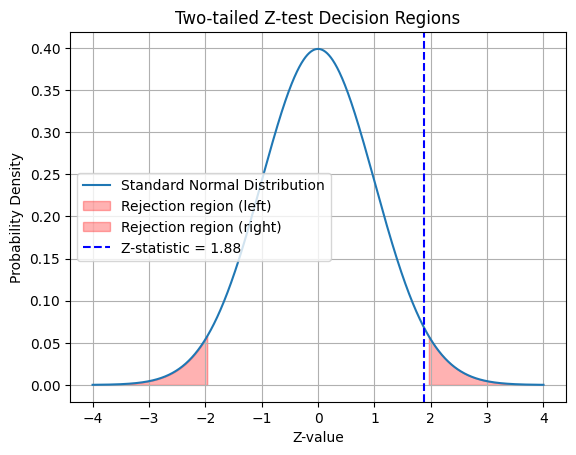

In [4]:
#Perform a two-tailed Z-test using Python and visualize the decision region on a plot.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def two_tailed_z_test(sample, pop_mean, pop_std, alpha=0.05):
    n = len(sample)
    sample_mean = np.mean(sample)

    # Calculate Z statistic
    z_stat = (sample_mean - pop_mean) / (pop_std / np.sqrt(n))

    # Critical z-values for two-tailed test
    z_critical_low = norm.ppf(alpha / 2)
    z_critical_high = norm.ppf(1 - alpha / 2)

    # Calculate p-value (two-tailed)
    p_value = 2 * (1 - norm.cdf(abs(z_stat)))

    print(f"Sample Mean: {sample_mean:.3f}")
    print(f"Z-statistic: {z_stat:.3f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < alpha:
        print("Reject the null hypothesis: significant difference.")
    else:
        print("Fail to reject the null hypothesis: no significant difference.")

    # Plot the standard normal distribution
    x = np.linspace(-4, 4, 1000)
    y = norm.pdf(x)

    plt.plot(x, y, label='Standard Normal Distribution')

    # Shade rejection regions
    plt.fill_between(x, 0, y, where=(x <= z_critical_low), color='red', alpha=0.3, label='Rejection region (left)')
    plt.fill_between(x, 0, y, where=(x >= z_critical_high), color='red', alpha=0.3, label='Rejection region (right)')

    # Mark the Z statistic
    plt.axvline(z_stat, color='blue', linestyle='--', label=f'Z-statistic = {z_stat:.2f}')

    plt.title('Two-tailed Z-test Decision Regions')
    plt.xlabel('Z-value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
population_mean = 100
population_std = 15
sample_data = np.random.normal(loc=105, scale=population_std, size=40)

two_tailed_z_test(sample_data, population_mean, population_std)

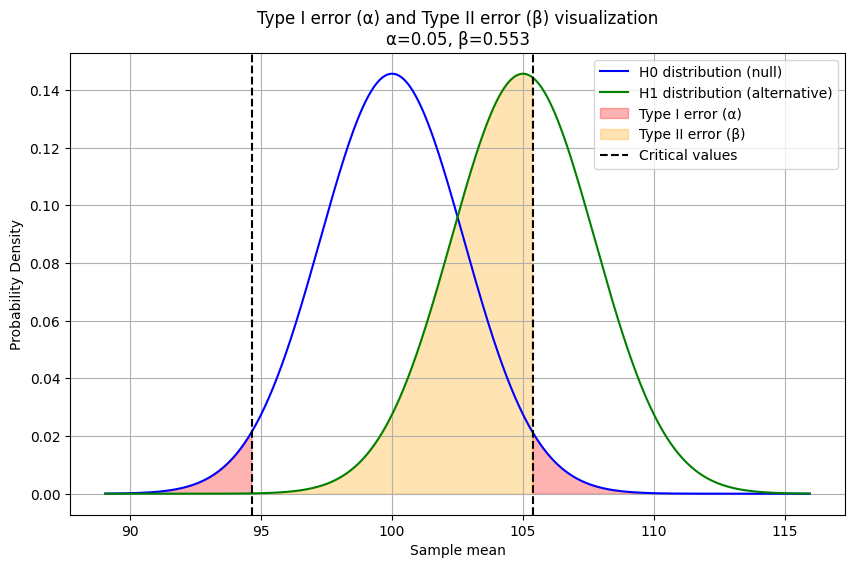

Type I error (α): 0.05
Type II error (β): 0.553


In [5]:
# Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def visualize_type1_type2_errors(mu0, mu1, sigma, n, alpha=0.05):
    # Standard error
    se = sigma / np.sqrt(n)

    # Critical z-value for given alpha (two-tailed)
    z_crit_low = norm.ppf(alpha / 2)
    z_crit_high = norm.ppf(1 - alpha / 2)

    # Critical sample means under H0
    crit_low = mu0 + z_crit_low * se
    crit_high = mu0 + z_crit_high * se

    # Calculate Type II error (beta)
    # Probability that test statistic falls between critical values under H1
    beta = norm.cdf(crit_high, loc=mu1, scale=se) - norm.cdf(crit_low, loc=mu1, scale=se)

    # Plot ranges
    x_min = mu0 - 4*se
    x_max = mu1 + 4*se
    x = np.linspace(x_min, x_max, 1000)

    # PDF under H0 and H1
    pdf_h0 = norm.pdf(x, loc=mu0, scale=se)
    pdf_h1 = norm.pdf(x, loc=mu1, scale=se)

    plt.figure(figsize=(10,6))
    plt.plot(x, pdf_h0, label='H0 distribution (null)', color='blue')
    plt.plot(x, pdf_h1, label='H1 distribution (alternative)', color='green')

    # Shade Type I error regions (tails under H0 beyond critical values)
    plt.fill_between(x, 0, pdf_h0, where=(x <= crit_low), color='red', alpha=0.3, label='Type I error (α)')
    plt.fill_between(x, 0, pdf_h0, where=(x >= crit_high), color='red', alpha=0.3)

    # Shade Type II error region (middle area under H1 between critical values)
    plt.fill_between(x, 0, pdf_h1, where=((x > crit_low) & (x < crit_high)), color='orange', alpha=0.3, label='Type II error (β)')

    plt.axvline(crit_low, color='black', linestyle='--', label='Critical values')
    plt.axvline(crit_high, color='black', linestyle='--')

    plt.title(f'Type I error (α) and Type II error (β) visualization\nα={alpha}, β={beta:.3f}')
    plt.xlabel('Sample mean')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.show()

    return alpha, beta

# Example usage
mu0 = 100     # Population mean under H0
mu1 = 105     # Population mean under H1 (true mean)
sigma = 15    # Known population std deviation
n = 30        # Sample size
alpha = 0.05  # Significance level

alpha_val, beta_val = visualize_type1_type2_errors(mu0, mu1, sigma, n, alpha)
print(f"Type I error (α): {alpha_val}")
print(f"Type II error (β): {beta_val:.3f}")

In [6]:
#Write a Python program to perform an independent T-test and interpret the results.
import numpy as np
from scipy.stats import ttest_ind

def independent_t_test(sample1, sample2, alpha=0.05):
    # Perform two-sample independent T-test
    t_stat, p_value = ttest_ind(sample1, sample2, equal_var=False)  # Welch’s t-test

    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < alpha:
        print("Reject the null hypothesis: the means are significantly different.")
    else:
        print("Fail to reject the null hypothesis: no significant difference between means.")

# Example usage
np.random.seed(0)
group1 = np.random.normal(loc=50, scale=5, size=30)
group2 = np.random.normal(loc=52, scale=5, size=30)

independent_t_test(group1, group2)

T-statistic: 1.2726
P-value: 0.2084
Fail to reject the null hypothesis: no significant difference between means.


Paired T-test statistic: -1.5431
P-value: 0.1393
Fail to reject null hypothesis: no significant difference detected.


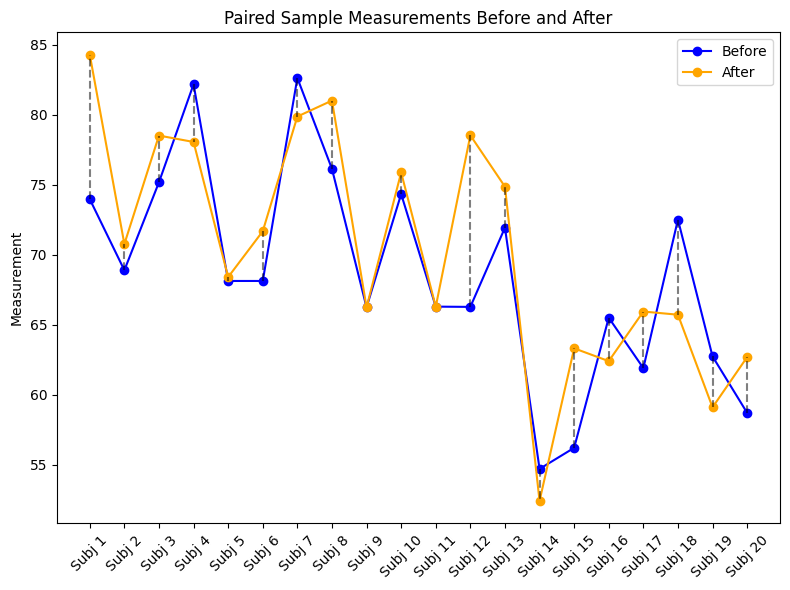

In [7]:
# Perform a paired sample T-test using Python and visualize the comparison results.
import numpy as np
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

# Simulated paired data (e.g., before and after treatment)
np.random.seed(42)
before = np.random.normal(loc=70, scale=8, size=20)
after = before + np.random.normal(loc=3, scale=5, size=20)  # small increase on average

# Perform paired T-test
t_stat, p_value = ttest_rel(before, after)

print(f"Paired T-test statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject null hypothesis: significant difference between paired samples.")
else:
    print("Fail to reject null hypothesis: no significant difference detected.")

# Visualization
plt.figure(figsize=(8,6))
plt.plot(range(len(before)), before, 'o-', label='Before', color='blue')
plt.plot(range(len(after)), after, 'o-', label='After', color='orange')

for i in range(len(before)):
    plt.plot([i, i], [before[i], after[i]], 'k--', alpha=0.5)

plt.xticks(range(len(before)), [f'Subj {i+1}' for i in range(len(before))], rotation=45)
plt.ylabel('Measurement')
plt.title('Paired Sample Measurements Before and After')
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
#Simulate data and perform both Z-test and T-test, then compare the results using Python.
import numpy as np
from scipy.stats import norm, t

def z_test(sample, pop_mean, pop_std):
    n = len(sample)
    sample_mean = np.mean(sample)
    z_stat = (sample_mean - pop_mean) / (pop_std / np.sqrt(n))
    p_value = 2 * (1 - norm.cdf(abs(z_stat)))
    return z_stat, p_value

def t_test(sample, pop_mean):
    n = len(sample)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    t_stat = (sample_mean - pop_mean) / (sample_std / np.sqrt(n))
    p_value = 2 * (1 - t.cdf(abs(t_stat), df=n-1))
    return t_stat, p_value

# Simulate data
np.random.seed(123)
pop_mean = 50
pop_std = 10
sample_size = 40

sample_data = np.random.normal(loc=52, scale=pop_std, size=sample_size)

# Perform tests
z_stat, z_p = z_test(sample_data, pop_mean, pop_std)
t_stat, t_p = t_test(sample_data, pop_mean)

print(f"Z-test:   Z = {z_stat:.4f}, p-value = {z_p:.4f}")
print(f"T-test:   t = {t_stat:.4f}, p-value = {t_p:.4f}")

# Interpretation
alpha = 0.05
def interpret_test(p, test_name):
    if p < alpha:
        print(f"{test_name}: Reject null hypothesis — significant difference from population mean.")
    else:
        print(f"{test_name}: Fail to reject null hypothesis — no significant difference.")

interpret_test(z_p, "Z-test")
interpret_test(t_p, "T-test")

Z-test:   Z = 0.7376, p-value = 0.4608
T-test:   t = 0.6245, p-value = 0.5359
Z-test: Fail to reject null hypothesis — no significant difference.
T-test: Fail to reject null hypothesis — no significant difference.


In [9]:
#Write a Python function to calculate the confidence interval for a sample mean and explain its significance.
import numpy as np
from scipy.stats import t

def confidence_interval(sample, confidence=0.95):
    n = len(sample)
    mean = np.mean(sample)
    std_err = np.std(sample, ddof=1) / np.sqrt(n)  # standard error
    df = n - 1

    # t critical value for two-tailed test
    t_crit = t.ppf((1 + confidence) / 2, df)

    margin_of_error = t_crit * std_err
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error

    return (lower_bound, upper_bound)

# Example usage
np.random.seed(0)
data = np.random.normal(100, 15, 50)
ci_lower, ci_upper = confidence_interval(data)
print(f"95% Confidence interval for the mean: ({ci_lower:.2f}, {ci_upper:.2f})")

95% Confidence interval for the mean: (97.26, 106.96)


In [10]:
#Write a Python program to calculate the margin of error for a given confidence level using sample data.
import numpy as np
from scipy.stats import t

def margin_of_error(sample, confidence=0.95):
    n = len(sample)
    std_err = np.std(sample, ddof=1) / np.sqrt(n)  # standard error
    df = n - 1

    # t critical value for two-tailed confidence interval
    t_crit = t.ppf((1 + confidence) / 2, df)

    return t_crit * std_err

# Example usage
np.random.seed(1)
data = np.random.normal(50, 8, 40)

moe = margin_of_error(data, confidence=0.95)
print(f"Margin of error at 95% confidence: {moe:.3f}")

Margin of error at 95% confidence: 2.499


In [12]:
#Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process.
def bayes_theorem(prior, likelihood, false_positive_rate):
    # Prior probabilities
    P_D = prior                      # Probability disease is present
    P_not_D = 1 - P_D               # Probability disease is absent

    # Likelihoods
    P_Pos_given_D = likelihood      # True positive rate (sensitivity)
    P_Pos_given_not_D = false_positive_rate  # False positive rate

    # Total probability of positive test (evidence)
    P_Pos = P_Pos_given_D * P_D + P_Pos_given_not_D * P_not_D

    # Posterior probability using Bayes' theorem
    P_D_given_Pos = (P_Pos_given_D * P_D) / P_Pos

    return P_D_given_Pos

# Given values
prior_disease = 0.01
sensitivity = 0.95
false_positive_rate = 0.05

posterior = bayes_theorem(prior_disease, sensitivity, false_positive_rate)
print(f"Probability of disease given positive test: {posterior:.4f}")


Probability of disease given positive test: 0.1610


In [13]:
#Perform a Chi-square test for independence between two categorical variables in Python.
import numpy as np
from scipy.stats import chi2_contingency

# Example contingency table:
# Rows = Category A (e.g., Male, Female)
# Columns = Category B (e.g., Like Product, Dislike Product)
# Data: counts of observations
data = np.array([[30, 10],   # Male: 30 like, 10 dislike
                 [20, 40]])  # Female: 20 like, 40 dislike

chi2, p, dof, expected = chi2_contingency(data)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

alpha = 0.05
if p < alpha:
    print("Reject null hypothesis: variables are dependent (associated).")
else:
    print("Fail to reject null hypothesis: variables are independent.")

Chi-square statistic: 15.0417
P-value: 0.0001
Degrees of freedom: 1
Expected frequencies:
[[20. 20.]
 [30. 30.]]
Reject null hypothesis: variables are dependent (associated).


In [14]:
#Write a Python program to calculate the expected frequencies for a Chi-square test based on observed
#data.
import numpy as np

def calculate_expected_frequencies(observed):
    # Calculate row sums and column sums
    row_sums = observed.sum(axis=1).reshape(-1, 1)  # Column vector
    col_sums = observed.sum(axis=0).reshape(1, -1)  # Row vector
    total = observed.sum()

    # Calculate expected frequencies: (row_sum * col_sum) / total
    expected = (row_sums @ col_sums) / total
    return expected

# Example observed data
observed = np.array([[30, 10],
                     [20, 40]])

expected = calculate_expected_frequencies(observed)
print("Observed frequencies:")
print(observed)
print("\nExpected frequencies:")
print(expected)

Observed frequencies:
[[30 10]
 [20 40]]

Expected frequencies:
[[20. 20.]
 [30. 30.]]


In [15]:
#Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution.
import numpy as np
from scipy.stats import chisquare

# Observed counts from rolling a dice 60 times (example data)
observed = np.array([8, 10, 9, 12, 11, 10])

# Expected counts if the dice is fair (equal probability for each face)
expected = np.full_like(observed, fill_value=observed.sum() / len(observed))

# Perform Chi-square goodness-of-fit test
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print(f"Chi-square statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: observed data does NOT fit the expected distribution.")
else:
    print("Fail to reject null hypothesis: observed data fits the expected distribution.")

Chi-square statistic: 1.0000
P-value: 0.9626
Fail to reject null hypothesis: observed data fits the expected distribution.
